In the year 2022, DTU had to move 1000 students to the minor town, Foulum, Jutland, as a consequence of the decision made by the Danish government to relocate a number of academic studies outside of the major cities. Although deciding which studies should be relocated was tough, DTU ended up moving four graduate programmes to the new campus in Foulum: Civil engineering (in the script named "BYG"), Mathematical Modelling and Computation ("MMC"), Quantitative Biology and Disease Modelling ("KBS") and Wind Energy ("WIND"). To accomodate the students (as mentioned, Foulum seems more like a village than a city), Anders Bjarklev and the Executive Board of DTU decided to build five different dorms. Each dorm could accomodate more or less 200 students. 

Soon after the opening of the new campus, a new corona variant, COVID-19 variant Epsilon, entered campus via a student who had cought the disease after a trip to Copenhagen. In this task, we try to simulate the spread of the Epsilon variant among the students to see how different levels of exposure from dorms (families) and graduate programme class mates (work places) affect the spread among the students. 

Since the students spent most of their time on campus, they did not interact with the rest of Foulum, and the village did not contribute to spreading the disease among the students. Also, teaching was already online because of the contagious COVID-19 Delta variant, so no professors or TAs working across the graduate programmes contributed to disease spread either. Therefore, we only simulate the students as spread out on 5 dorms (families) and 4 graduate programmes (work places). 

Also, moving the graduate programmes to Jutland caused a new number of students on each graduate programme. For example, "KBS" suddenly got a lot of applicants (after all, a whole group of KU veterinary students had also moved to Foulum, and this caused a huge inspiration for disease modelling among young Danes). Actually, abotut 40$\%$ of the students ended up studying "KBS". To adjust to the distribution of students, our group of simulated students contains 1000 students, each of them assigned a study with the following probabilities: "KBS" (p = 0.4), "WIND" (p = 0.3), "MMC" (p = 0.2) and "BYG" (p = 0.1). Each student is also assigned to a dorm (dorms are named 1, 2, 3, 4 and 5) with a probability of p = 0.2 for each dorm. This means that the dorms will most likely have students from all graduate programmes and vice versa. 

We assume that the students had excellent immune systems and would produce highly effective antibodies after an infection. Therefore, we have chosen to work with a common SIR model where students cannot become re-infected or spread the disease after having recovered (R) from infection (I).

As the previous tested models, this simulation is chosen to be discrete (students can move from one state to another from day to day, not at any time). After all, in 2022 the students had to count infected and recovered people themselves, and since they had to spent a lot of time on their studies, they could not update the statistics at every minute. We therefore think that a discrete model suits the situation. 

Probabilities for going from one state to another is defined as follows:

$p_{SI}$: The official probability of become infected is p_SI = 0.6. However, the actual probability, $p_{SI}$ for a student $i$ depends on the student's "contact surface" (CS) with the disease. The contact surface depends on the infection level in the student's dorm and graduate programme, assuming that the student interacts with only dorm mates and graduate programme mates. Thereby, the actual probability of becoming infected for a student in dorm $x$ and graduate programme $y$ will be:

$$ p_{SI_i} = p_{SI} \cdot CS = p_{SI} \cdot (\frac{I_x + I_y}{n_{dorm_x} + n_{graduate_y}}) $$

where $I_x$ and $I_y$ are the numbers of infected students in dorm $x$ and graduate programme $y$, and $n_{dorm_x}$ is the number of people in dorm $x$ and $n_{graduate_y}$ the number of people in graduate programme $y$. This means that the risk of infection is both related to dorm and graduate programme, and students in e.g. small programmes would have a higher risk of getting infected than students in larger programmes if there are few infected people in the programme. As for the dorms, these should contribute equally to the risk of infection because they have the same size. We have chosen to do this in order to better evaluate the impact of one group type (dorms) as a cause of varying risks in another group type (graduate programmes).

$p_{IS}$: Each day, the probability of recovering is p = 0.3. This should give a disease time with a mean of about 3 days.

The goal of the simulations is to investigate how the size of the graduate programme affects the maximum number of infected individuals in each of the programmes, and how the maximum number of infected individuals in each programme is affected by where the disease is introduced (which programme does patient 0 attend?). 

In this experiment, we therefore do four setups: One where patient 0 is from BYG, one where patient 0 is from MMC, etc. For each setup, we run 100 simulations of the epidemic. This is done because the spread of the disease is dependent on stochastic variables and processes. We then find the mean maximum number of infected (with confidence intervals) for each graduate programme across the 100 simulations. 

In [221]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

In [222]:
# Define number of people (you may change here)
n = 1000

# Define number of families (you may change here)
n_families = 5
family_types = np.arange(1, n_families+1)

# Define work types (you may change here)
work_types = np.array(["BYG", "MMC", "WIND", "KBS"])
work_probs = np.array([0.1, 0.2, 0.3, 0.4])
n_work_types = len(work_types)

# Define vector of states
#states = np.repeat("S",n)
#states[0] = "I"
#states_matrix = np.copy([states])

states_matrix = np.vstack((states_matrix, states ))
#print(states_matrix)

# Probabilities of entering 
prob_S_I = 0.6
prob_I_R = 0.3

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])


# Generate workplaces
workplaces_sorted = np.sort(np.random.choice(work_types,n, p = work_probs))
counts = np.unique(workplaces_sorted, return_counts = True)[1]
workplaces_counts_sorted = np.repeat(counts, counts)
random_positions = np.random.choice(np.arange(0,n), size = n, replace=False)

# Update workplaces based on positions
workplaces = workplaces_sorted[random_positions]
workplaces_counts = workplaces_counts_sorted[random_positions]

# Update families based on positions
families = np.sort(np.random.choice(family_types, n))
counts = np.unique(workplaces_sorted, return_counts = True)[1]
families_counts = np.repeat(counts, counts)

# Vectors for iterations
iterations = 100
#frac_sick_workplaces = np.zeros(len(wor))   # Fraction of sicks for each run for each workplace
mean_max_sick_workplaces = np.zeros((len(work_types), len(work_types)))   # Max fractions for each workplace start 
CI_lower = np.zeros((len(work_types), len(work_types))) 
CI_upper = np.zeros((len(work_types), len(work_types))) 

# The first infected has this workplace
#patient_0_work = "BYG"
number_of_patient_0 = 1

### How many get infected in total? 
mean_infected_workplaces = np.zeros((len(work_types), len(work_types)))
CI_lower_I = np.zeros((len(work_types), len(work_types))) 
CI_upper_I = np.zeros((len(work_types), len(work_types))) 


# Loop through patient 0 workplaces
for j in range(len(work_types)):
    
    patient_0_work = work_types[j]
    one_hundred_max_fracs = np.zeros((iterations,len(work_types)))
    one_hundred_infected = np.zeros((iterations,len(work_types)))  ###

    # 100 iterations
    for i in range(iterations):

        # Reset vector of states
        states = np.repeat("S",n)
        states[np.where(workplaces == patient_0_work)[0][0:number_of_patient_0]] = "I"
        #states[0] = "I"
        states_matrix = np.copy([states])

        # Reset vector with maximum fractions
        max_fracs = np.zeros(4) # BYG, MMC, KBS, WIND

        while ("I" in states):

            # Get positions of S, I, R
            S_index = np.where(states == "S")[0]
            I_index = np.where(states == "I")[0]
            R_index = np.where(states == "R")[0]

            # Count infected at each worktype
            work_I = np.zeros(n)
            for work in work_types:
                work_index = np.where(workplaces == work)[0]
                work_I[work_index] += len(np.where((workplaces == work) & (states == "I"))[0])

            # Count infected at each family  
            family_I = np.zeros(n)
            for family in family_types:
                family_index = np.where(families == family)[0]
                family_I[family_index] += len(np.where((families == family) & (states == "I"))[0])

            # Calculate probability
            prob_vector = prob_S_I * ((work_I + family_I) / (workplaces_counts + families_counts))


            for pos in S_index:
                states[pos] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_vector[pos], prob_vector[pos]]))



            # Update infected
            states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


            # Update states_matrix
            states_matrix = np.vstack((states_matrix, states ))

            n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
            n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
            n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])


        # Save max number of infected for each workplace 
        for work in range(len(work_types)):
            work_string = work_types[work]
            for row in states_matrix:
                w = len(np.where((row == "I") & (workplaces == work_string))[0]) / np.sum(workplaces == work_string)
                if w > max_fracs[work]:
                    max_fracs[work] = w
                    # Max_fracs now contain the maximum number of infected during the period for each group
                    
            
        # Collect max fractions of infected for each simulation (of 100 simuations)    
        one_hundred_max_fracs[i,:] = max_fracs
        
        
        ### How many got infected in each 
        # last one = states
        for q in range(len(work_types)):
            #print(np.where((states == "R") & (workplaces == work_types[q]))[0])
            #print(len(np.where(states == "R") & (workplaces == work_types[q])[0]))
            one_hundred_infected[i,q] = len(np.where((states == "R") & (workplaces == work_types[q]))[0]) / np.sum(workplaces == work_types[q])
        
        
    
    # Mean and CI of max fractions
    mean_max_sick_workplaces[j, :] = one_hundred_max_fracs.mean(axis = 0)
    conf_mean_max_sick_workplaces = stats.norm.interval(alpha=0.95, loc=one_hundred_max_fracs.mean(axis = 0), scale=stats.sem(one_hundred_max_fracs, axis = 0))
    CI_lower[j, :] = conf_mean_max_sick_workplaces[0]
    CI_upper[j, :] = conf_mean_max_sick_workplaces[1]
    
    #print('Disease starts in', patient_0_work)
    #print('Mean fraction in BYG, MMC, WIND, KBS:')
    #print(mean_max_sick_workplaces[j,:])
    #print(CI_lower[j,:])
    #print(CI_upper[j,:])
    #print(' ')
    
    ### Mean and CI of infected
    mean_infected_workplaces[j, :] = one_hundred_infected.mean(axis = 0)
    conf_infected = stats.norm.interval(alpha=0.95, loc=one_hundred_infected.mean(axis = 0), scale=stats.sem(one_hundred_infected, axis = 0))
    CI_lower_I[j, :] = conf_infected[0]
    CI_upper_I[j, :] = conf_infected[1]
    

    
    

The following two plots show a simulation of the pandemic with patient 0 being from KBS. As expected, the infected fraction is highest in KBS in the very beginning, soon followed by MMC. Both KBS and WIND, which are the largest programmes, have a period of constant fractions (in KBS at about 0.1 from t = 15 to t = 25, and in WIND at about 0.075 from about t = 15 to t = 30). MMC, which is a smaller study, has a clearer spike at round t = 22, and BYG, which is the smallest study, has a very clear spike around t = 20. It therefore seems that larger programmes have longer periods with a constant amount of infected, while smaller studies are more likely to have one spike. This seems reasonable since larger programmes contain more individuals to keep the disease alive for long, while the individuals in smaller programmes may more likely have few time points where many are infected. The epidemic dies out after about 60 days. 

As for dorms, dorm 2 reaches lower fractions of people than the four other dorms. The disease also seems to reach low levels faster than in the other dorms. The disease seems to start in dorm 1, which also initially has higher fractions of infected and also reach the highest fraction. However, the disease also reaches low fractions (after t = 35) faster than the other dorms, indicating that this dorm also reaches a higher amount of recovered sooner, thereby limiting the spread of the disease. 

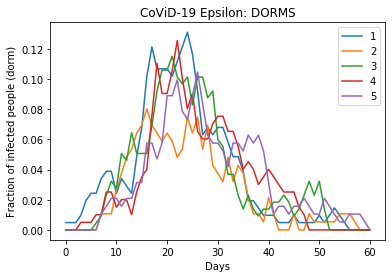

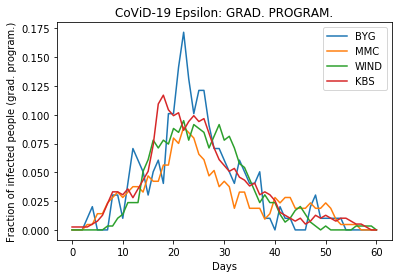

In [230]:
plt.figure()

for fam_number in family_types[0:6]:
    n_fam = np.array([])
    for row in states_matrix:
        f = len(np.where((row == "I")& (families == fam_number))[0])
        n_fam = np.concatenate([n_fam, np.array([f])])
        
    n_frac_fam = n_fam/np.sum(families == fam_number)
    
    plt.plot(n_frac_fam, label = str(fam_number))

plt.legend()
plt.title("CoViD-19 Epsilon: DORMS")
plt.ylabel("Fraction of infected people (dorm)")
plt.xlabel("Days")
plt.show()


plt.figure()

for work_string in work_types:
    n_work = np.array([])
    for row in states_matrix:
        w = len(np.where((row == "I")& (workplaces == work_string))[0])
        n_work = np.concatenate([n_work, np.array([w])])
    
    n_frac_work = n_work/np.sum(workplaces == work_string)
        
    plt.plot(n_frac_work, label = work_string)

plt.legend()
plt.title("CoViD-19 Epsilon: GRAD. PROGRAM.")
plt.ylabel("Fraction of infected people (grad. program.)")
plt.xlabel("Days")
plt.show()

## Maximum number of infected at time t

The plot below shows the mean maximum fraction of infected people in each programme depending on the programme of patient zero. No matter which programme patient zero belongs to, BYG, which is the smallest programme, seems to have the highest fraction of maximum infected at one time point, which seems reasonable since BYG contains fewer individuals, and their individual infection risk is higher when few people are infected than if they were part of a larger group. 

Also, the max fraction of infected in any of the programmes is lowest when the disease starts in BYG. This could be because BYG is the smallest programme, and the disease spread here may therefore be shorter, but still keep the spike strukture which we saw in the plot above.

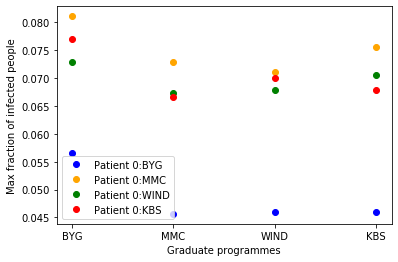

In [224]:
colors = ['blue', 'orange', 'green', 'red']
for i in range(len(work_types)):
    plt.plot(np.arange(len(work_types)), mean_max_sick_workplaces[i, :], 'bo', label = 'Patient 0:' + work_types[i], color = colors[i])
    #plt.plot(np.arange(len(work_types)), CI_lower[i, :], "_", color = colors[i])
    #plt.plot(np.arange(len(work_types)), CI_upper[i, :], "_", color = colors[i])
plt.legend(loc = 'lower left')
plt.xlabel("Graduate programmes")
plt.xticks(ticks = np.arange(len(work_types)), labels = work_types)
plt.ylabel("Max fraction of infected people")
plt.show()

Below is shown the mean of max fractions with 95$\%$ confidence intervals, one table for each setup (patient zero starts in different programmes). Generally, the confidence intervals span over the mean $±$ 0.014, which in many cases correspond to about 1/5 or 1/4 of the mean max fraction. It is therefore hard to estimate the true mean based on the confidence intervals. 

In [231]:
for i in range(len(work_types)):
    # Update statistics 
    new_stats = np.array([work_types, mean_max_sick_workplaces[i,:],CI_lower[i,:], CI_upper[i,:]]).T

    # Print statistics table
    print('Patient zero from:', work_types[i])
    print(tabulate(new_stats, headers=["Programme", "Mean max fraction", "CI lower", "CI upper"], tablefmt='orgtbl'))
    print(' ')
    print(' ')

Patient zero from: BYG
| Programme   |   Mean max fraction |   CI lower |   CI upper |
|-------------+---------------------+------------+------------|
| BYG         |           0.0565657 |  0.0439941 |  0.0691373 |
| MMC         |           0.0456338 |  0.033498  |  0.0577696 |
| WIND        |           0.0460339 |  0.0337057 |  0.0583621 |
| KBS         |           0.0459796 |  0.0337882 |  0.0581711 |
 
 
Patient zero from: MMC
| Programme   |   Mean max fraction |   CI lower |   CI upper |
|-------------+---------------------+------------+------------|
| BYG         |           0.0811111 |  0.0659932 |  0.0962291 |
| MMC         |           0.0728638 |  0.0603052 |  0.0854225 |
| WIND        |           0.0711864 |  0.0581615 |  0.0842113 |
| KBS         |           0.0756743 |  0.0617301 |  0.0896185 |
 
 
Patient zero from: WIND
| Programme   |   Mean max fraction |   CI lower |   CI upper |
|-------------+---------------------+------------+------------|
| BYG         |           

## Total number of infected

The plot below shows the mean fraction (of the 100 simulations) of individuals who have at some point been infected in each of the four programmes for each of the patient zero setups. First of all, it appears that when a programme contains more individuals, a slightly higher fraction of them will at some point fall ill (e.g. KBS fractions are generally higher than BYG and MMC fractions, and in some setups higher than WIND fractions). Second of all, it seems that the total fraction of infected people in the groups are somewhat the same if the disease starts in MMC, WIND and KBS (more than 1/3), but if the disease starts in BYG, which is the smallest programme, a much lower fraction (1/4) of each programme becomes infected. This could be because BYG is small and the disease may rise and fall quickly, and the BYG people may live in different dorms, spreading the disease less intensely in the dorms. Also, if the disease starts in BYG, the simulation may stop faster because fewer people are in risk of infection. Further experiments could investigate the effects of the dorms on the spread to find out exactly why the infected fraction is so low when it starts in BYG. The BYG students should have a larger individual risk with few infected in their group, but the small size of the study may have a limiting effect. 


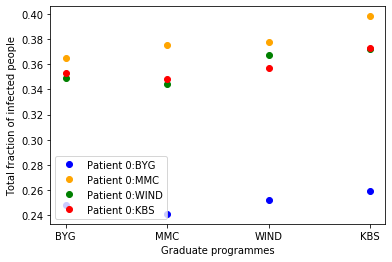

In [228]:
colors = ['blue', 'orange', 'green', 'red']
for i in range(len(work_types)):
    plt.plot(np.arange(len(work_types)), mean_infected_workplaces[i, :], 'bo', label = 'Patient 0:' + work_types[i], color = colors[i])
    #plt.plot(np.arange(len(work_types)), CI_lower[i, :], "_", color = colors[i])
    #plt.plot(np.arange(len(work_types)), CI_upper[i, :], "_", color = colors[i])
plt.legend(loc = 'lower left')
plt.xlabel("Graduate programmes")
plt.xticks(ticks = np.arange(len(work_types)), labels = work_types)
plt.ylabel("Total fraction of infected people")
plt.show()

Below is shown the means of infected individuals with 95$\%$ confidence intervals. The confidence intervals are generally equal to the mean ± 0.6, which is also about 1/5 of the mean in most cases. Again, this makes it hard to investigate the true mean of fraction of infected individuals.

In [232]:
for i in range(len(work_types)):
    # Update statistics 
    new_stats = np.array([work_types, mean_infected_workplaces[i,:], CI_lower_I[i,:], CI_upper_I[i,:]]).T

    # Print statistics table
    print('Patient zero from:', work_types[i])
    print(tabulate(new_stats, headers=["Programme", "Mean infected fraction", "CI lower", "CI upper"], tablefmt='orgtbl'))
    print(' ')
    print(' ')

Patient zero from: BYG
| Programme   |   Mean infected fraction |   CI lower |   CI upper |
|-------------+--------------------------+------------+------------|
| BYG         |                 0.248081 |   0.186146 |   0.310015 |
| MMC         |                 0.241033 |   0.177751 |   0.304314 |
| WIND        |                 0.252339 |   0.186127 |   0.318551 |
| KBS         |                 0.258957 |   0.190903 |   0.32701  |
 
 
Patient zero from: MMC
| Programme   |   Mean infected fraction |   CI lower |   CI upper |
|-------------+--------------------------+------------+------------|
| BYG         |                 0.365051 |   0.299521 |   0.43058  |
| MMC         |                 0.375164 |   0.309544 |   0.440785 |
| WIND        |                 0.377966 |   0.310341 |   0.445591 |
| KBS         |                 0.398244 |   0.327139 |   0.46935  |
 
 
Patient zero from: WIND
| Programme   |   Mean infected fraction |   CI lower |   CI upper |
|-------------+----------

## Conclusion

All in all, it seems that initiation of disease in smaller groups (e.g. BYG) (which therefore have a higher individual risk of infection with each new affected group member) will lead to lower maximum fractions at a time point t in all other groups and lower total fractions of infections. Further investigations could include more experiments on the dorm groups or include more of the compartments used in the other described sections in this report: What if the disease is deadly, or what if the students can be reinfected?

Based on our results, in order to deal with future epidemics (both at DTU Foulum and in general) we recommend keeping students/people gathered in smaller groups. This should be done in order to keep both the maximum fraction of infected people at any time point low (which is for example relevant when estimating the necessary hospital capacity) and keep the total number of infected people low (to protect the population and limit the disease). This is much in line with the "social bubbles" recommended by the authorities during the first COVID-19 waves. 
